In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

I imported csv to be able to work with csv files in my project. I imported pandas and numpy because I need to work with dataframe and some of the numpy methods like np.isnan() from the package. I imported matplotlib to graph some of my data.

1. What is the trend of renewable energy as % of primary energy supply of the G20 countries for the past 5 years?

Note:
I imported the data of % of primary energy supply(renewable) of the past 5 years from the G20 countries. Cleaned the data by only selecting the countries and their corresponding values to create my datafram. I set the index to the countries and rename the values to % of primary energy supply(renewable). Then I created a graph that would show the trends of renewable energy development for these countries.

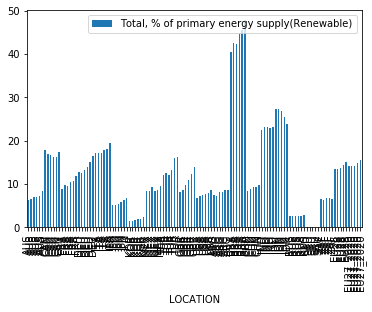

In [2]:
df = pd.read_csv("5yrrenew.csv") #import 5 year renewable data csv
df = df[["LOCATION", "Value"]] #use only the Location and value columns
df = df.set_index("LOCATION") #Make Country as index
df = df.rename(columns={'Value': 'Total, % of primary energy supply(Renewable)'}) #rename column of Value to Total, % of primary energy supply(Renewable)

df.plot.bar() #produce a bar graph of the renewable energy trend
plt.show() #show graph

In [3]:
df

,"Total, % of primary energy supply(Renewable)"
LOCATION,
AUS,6.321681
AUS,6.554044
AUS,6.957394
AUS,7.036090
AUS,7.312959
...,...
EU27_2020,14.045980
EU27_2020,14.150340
EU27_2020,14.183970


In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 119 entries, AUS to EU27_2020
Data columns (total 1 columns):
Total, % of primary energy supply(Renewable)    119 non-null float64
dtypes: float64(1)
memory usage: 1.9+ KB
None


Ans: We can see that the trend of % of primary energy supply being renewable energy for G20 countries for the past 5 years are in an increasing trend.

2. How does the % of primary energy supply(Renewable) compare to % of primary energy supply(Non-renewable) for the G20 countries in 2019? Which country has highest % renewable energy as their primary energy supply, and which country has lowest % renewable energy as their primary energy supply among the G20 countries?

Note:
I imported the data of % of primary energy supply(renewable) from 2019 of the G20 countries. Cleaned the data by only selecting the countries and their corresponding values to create my dataframe. I set the index to the countries and rename the values to % of primary energy supply(renewable). I calculated the % of primary energy supply(non-renewable) by using the data that I have for % renewable energy. I then put the % non-renewable and renewable energy side by side in a dataframe and created a graph to illustrate the differences, and find out which coutry has the highest and lowest % of primary energy supply in renewable energy.

           Total, % of primary energy supply(Renewable)  \
LOCATION                                                  
AUS                                            7.312959   
CAN                                           16.153870   
FRA                                           10.613270   
DEU                                           15.018650   
ITA                                           18.134140   
JPN                                            6.270579   
KOR                                            2.000436   
MEX                                            8.609434   
TUR                                           15.931540   
GBR                                           12.224810   
USA                                            7.903494   
ARG                                            8.571218   
BRA                                           45.622740   
CHN                                            9.673476   
IND                                           23.134850 

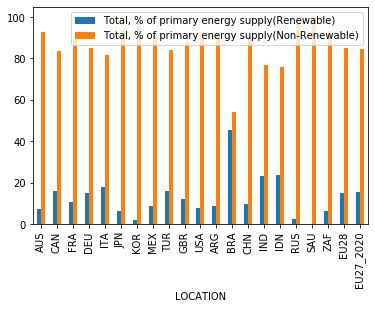

In [4]:
df1 = pd.read_csv("2019renew.csv") #df1 is % of primary energy supply as renewable energy 2019
df1 = df1[["LOCATION", "Value"]] #use only the Location and value columns
df1 = df1.set_index("LOCATION") #Make Country as index
df1 = df1.rename(columns={'Value': 'Total, % of primary energy supply(Renewable)'}) #rename the Value Column to Total, % of primary energy supply(Renewable)

#calculate the % of primary energy supply (Non-renewable)
nonren = []
for x in df1['Total, % of primary energy supply(Renewable)']:
    nonren.append(100 -x) #Store the result in list

df1['Total, % of primary energy supply(Non-Renewable)'] = nonren
print(df1)
print(df1.describe())
df1.info()

df1.plot.bar()
plt.show()

In [5]:
renE = df1['Total, % of primary energy supply(Renewable)'] #selet column for renewable energy
renEmax = renE.idxmax() #find country with highest % of primary energy supply in renewable energy
renEmin = renE.idxmin() #find country with lowest % of primary energy supply in renewable energy
print("In 2019, the country who has the highest and lowest % of primary energy supply in renewable energy are {0}, and {1} respectively.".format(renEmax, renEmin))

In 2019, the country who has the highest and lowest % of primary energy supply in renewable energy are BRA, and SAU respectively.


Ans: As of 2019, non-renewable energy still contributes the most % to the total primary energy supply of the G20 countries. Brazil is producing the highest % of renewable energy as their highest primary energy supply and Saudi Arabia is producing the lowest %. Since we have seen that the trend of renewable energies for the G20 trend is increaing, it is fair to assume that % of primary energy supply being renewable energy for the G20 countries would gradually increase in the near future.

3. Do % primary energy supply in renewable energy affect the amount of electricity generated? (2017-2019)

Note:
I wrote a function to find out the correlation coefficient between two variables. I cleaned the data in similar ways as above, but this time, I also incorporated data on ELectricity generated and the data is for all countries around the globe. (that have available data) Another thing that I did in cleaning the data is to replace the NaN values with 0s in order to obtain a graph that would illustrate the relationship between Electricity Generated and % primary energy supply(renewable). I repeated the steps for all 3 years between 2017-2019. I obtain a correlation coefficient for each year between the 2 variables and eventually come up with a conclusion based on both the graphs and the coefficients.

In [6]:
#function to find correlation coefficient
def correlation_coeff(n, m):
    indices = []
 # Find indices where an element is nan in either m or m
    for i in range(len(n)):
        if np.isnan(n[i]) or np.isnan(m[i]):
             indices.append(i)
 # Create new n and m without any nan values
        new_n = [n[i] for i in range(len(n)) if i not in indices]
        new_m = [m[i] for i in range(len(m)) if i not in indices]
 # Return correlation coefficient between X and Y
    return np.corrcoef(new_n, new_m)[0, 1]

Finding relationship for 2017

In [7]:
dfe = pd.read_csv("elecgen2017.csv") #dfe is Electricity produced in Gigawatt-hour for G20 in 2017
dfe = dfe[["LOCATION", "Value"]] #select countries and electricity generated data only
dfe = dfe.set_index("LOCATION") #Make Country as index
dfe = dfe.rename(columns={'Value': 'Eletricity Generated(GWh), 2017'}) #rename Value to Electricity Generated column for dfe

In [8]:
df7 = pd.read_csv("2017renew.csv") #df7 is % of primary energy supply for renewable energy 2017
df7 = df7[["LOCATION", "Value"]] #select countries and % of primary energy supply(renewable) only
df7 = df7.set_index("LOCATION") #Make Country as index
df7 = df7.rename(columns={'Value': 'Total, % of primary energy supply(Renewable), 2017'}) #rename Value to % of primary energy supply (renewable) column for df7

In [9]:
tabl0 = pd.concat([dfe, df7], axis=1) #merge the dataframe of dfe and df7 side by side

#replace nan in either column with 0
for i in range(len(tabl0[['Total, % of primary energy supply(Renewable), 2017']])):
    if np.isnan(tabl0.iloc[i,0]):
        tabl0.iloc[i,0] = 0
    if np.isnan(tabl0.iloc[i,1]):
        tabl0.iloc[i,1] = 0
        
    
print(tabl0)

     Eletricity Generated(GWh), 2017  \
AGO                            0.000   
ALB                         4497.807   
ARE                            0.000   
ARG                            0.000   
ARM                            0.000   
..                               ...   
WLD                            0.000   
YEM                            0.000   
ZAF                            0.000   
ZMB                            0.000   
ZWE                            0.000   

     Total, % of primary energy supply(Renewable), 2017  
AGO                                          53.157570   
ALB                                          27.384660   
ARE                                           0.220792   
ARG                                           8.055003   
ARM                                          10.047360   
..                                                 ...   
WLD                                          13.385500   
YEM                                           4.391290 

/Users/percy/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In 2017, the correlation coefficient between Enelectricy Generated by countries and % of primary renewable energy supply is -0.11189937597193365.


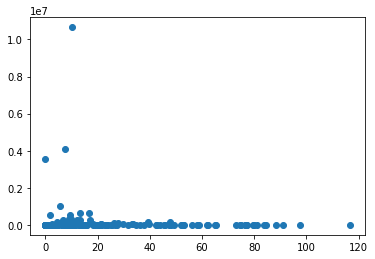

In [10]:
plt.scatter(tabl0['Total, % of primary energy supply(Renewable), 2017'], tabl0['Eletricity Generated(GWh), 2017']) #create a scatter plot between the variables
coeff = correlation_coeff(tabl0['Total, % of primary energy supply(Renewable), 2017'], tabl0['Eletricity Generated(GWh), 2017']) #find the correlaiton coefficient
print("In 2017, the correlation coefficient between Enelectricy Generated by countries and % of primary renewable energy supply is {0}.".format(coeff))

Find the relationship in 2018

In [11]:
df9 = pd.read_csv("ele2018all.csv") #df9 is Electricity produced in Gigawatt-hour globally in 2018
df9 = df9[["LOCATION", "Value"]] #select countries and electricity generated data only
df9 = df9.set_index("LOCATION") #Make Country as index
df9 = df9.rename(columns={'Value': 'Eletricity Generated(GWh), 2018'}) #rename Value to Electricity Generated column for df9

In [12]:
dfr = pd.read_csv("renew2018all.csv") #import renewable data for 2018 in csv
dfr = dfr[["LOCATION", "Value"]] #use only the Location and value
dfr = dfr.set_index("LOCATION") #Make Country as index
dfr = dfr.rename(columns={'Value': 'Total, % of primary energy supply(Renewable), 2018'}) #rename column of Value to Total, % of primary energy supply(Renewable)


In [13]:
tabl1 = pd.concat([df9, dfr], axis=1) #merge the two dataframe side by side 

#replacing NaN with 0 in either column
for i in range(len(tabl1[['Total, % of primary energy supply(Renewable), 2018']])):
    if np.isnan(tabl1.iloc[i,0]):
        tabl1.iloc[i,0] = 0
    if np.isnan(tabl0.iloc[i,1]):
        tabl1.iloc[i,1] = 0

print(tabl1)

     Eletricity Generated(GWh), 2018  \
AGO                            0.000   
ALB                         8508.253   
ARE                            0.000   
ARG                            0.000   
ARM                            0.000   
..                               ...   
WLD                            0.000   
YEM                            0.000   
ZAF                            0.000   
ZMB                            0.000   
ZWE                            0.000   

     Total, % of primary energy supply(Renewable), 2018  
AGO                                          47.976260   
ALB                                          43.505480   
ARE                                           0.311277   
ARG                                           8.221233   
ARM                                           9.565959   
..                                                 ...   
WLD                                          13.523480   
YEM                                           5.248347 

/Users/percy/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In 2018, the correlation coefficient between Enelectricy Generated by countries and % of primary renewable energy supply is -0.09384231079147685.


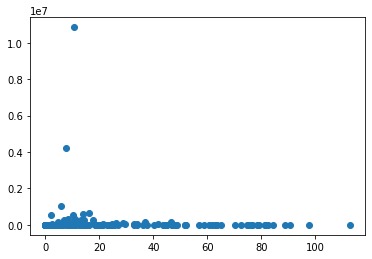

In [14]:
#Finding the correlation of primary energy supply of countries being renewable energy and the amount of electricity generated for countries in 2018.
plt.scatter(tabl1['Total, % of primary energy supply(Renewable), 2018'], tabl1['Eletricity Generated(GWh), 2018'])
coeff = correlation_coeff(tabl1['Eletricity Generated(GWh), 2018'],tabl1['Total, % of primary energy supply(Renewable), 2018'])
print("In 2018, the correlation coefficient between Enelectricy Generated by countries and % of primary renewable energy supply is {0}.".format(coeff))

Find the relationship in 2019

In [15]:
df3 = pd.read_csv("elegen.csv") #df3 is Electricity produced in Gigawatt-hour for G20 in 2019
df3 = df3[["LOCATION", "Value"]] #select countries and electricity generated data only
df3 = df3.set_index("LOCATION") #Make Country as index
df3 = df3.rename(columns={'Value': 'Eletricity Generated(GWh), 2019'}) #rename Value to Electricity Generated column for df3

In [16]:
dff = pd.read_csv("2019renew.csv") #dff is % of primary energy supply for renewable energy 2019
dff = dff[["LOCATION", "Value"]] #select countries and % of primary energy supply (renewable) only
dff = dff.set_index("LOCATION") #Make Country as index
dff = dff.rename(columns={'Value': 'Total, % of primary energy supply(Renewable), 2019'})

In [17]:
tabl = pd.concat([dff, df3], axis=1) #merge two dataframes side by side

#replace nan with 0 for either column
for i in range(len(tabl[['Total, % of primary energy supply(Renewable), 2019']])):
    if np.isnan(tabl.iloc[i,0]):
        tabl.iloc[i,0] = 0
    if np.isnan(tabl.iloc[i,1]):
        tabl.iloc[i,1] = 0
        
    
print(tabl)

           Total, % of primary energy supply(Renewable), 2019  \
ARG                                                 8.571218    
AUS                                                 7.312959    
BRA                                                45.622740    
CAN                                                16.153870    
CHN                                                 9.673476    
DEU                                                15.018650    
EU27_2020                                          15.482430    
EU28                                               15.129140    
FRA                                                10.613270    
GBR                                                12.224810    
IDN                                                23.879540    
IND                                                23.134850    
ITA                                                18.134140    
JPN                                                 6.270579    
KOR                      

/Users/percy/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In 2019, the correlation coefficient between Enelectricy Generated by countries and % of primary renewable energy supply is -0.31973953808529754.


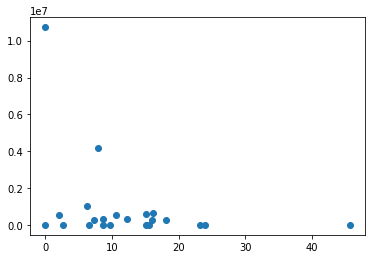

In [18]:

plt.scatter(tabl['Total, % of primary energy supply(Renewable), 2019'], tabl['Eletricity Generated(GWh), 2019'])
coeff = correlation_coeff(tabl['Total, % of primary energy supply(Renewable), 2019'], tabl['Eletricity Generated(GWh), 2019']) #find the correlation coefficienty of the 2 columns
print("In 2019, the correlation coefficient between Enelectricy Generated by countries and % of primary renewable energy supply is {0}.".format(coeff))

Ans: From all of the correlation coefficient and graphs from 2017-2019 we can tell that there is no direct relation between amount of electricity generated and the % of primary energy supply being renewable energy. 